In [13]:
import csv
import numpy as np
import pandas as pd
#-------------read data_panda
name = ['gender', 'smiling']
#data = pd.read_csv('./dataset_AMLS_20-21/celeba/labels.csv',sep='\t',header=0,names = name)
data = pd.read_csv('./dataset_AMLS_20-21/celeba/labels.csv',sep='\t')
Y_A10=data['gender']
Y_A11=data['smiling']
y_1 = Y_A10
y_2 = Y_A11
for i in range(y_1.shape[0]):
    if y_1[i] == -1:
        y_1[i] = 0
    else:
        y_1[i] = 1 #防止标签出现负数，如果这里负数的话后面计算loss就会出现nan
for i in range(y_2.shape[0]):
    if y_2[i] == -1:
        y_2[i] = 0
    else:
        y_2[i] = 1

data_csv = open('data.csv', 'r', newline = '')
#read cvs file
reader = csv.reader(data_csv)
rows= [row for row in reader]
data_csv.close()
def listToString(s):      
    str1 = " "      
    return (str1.join(s)) 
X = np.zeros((5000,38804),dtype='float')
for i in range(len(rows)):
    str0 = listToString(rows[i])
    x = str0.split(' ')
#list-str-float
    for j in range(X.shape[1]):
        x[j] = float(x[j])
    X[i,:] = x
X = X.reshape((5000,178,218,1))

C:\Users\93554\anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\93554\anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\93554\anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\93554\anaconda3\envs\mytf\lib\

In [29]:
print(X[0,0,0,0])

NameError: name 'X' is not defined

In [26]:
yy_1 = y_1.to_numpy()

In [27]:
print(type(yy_1))

<class 'numpy.ndarray'>


In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

In [40]:
from tensorflow import keras

In [2]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [48]:
import landmarks as l2
def get_data():

    X, y = l2.extract_features_labels()
    #Y = np.array([y, -(y - 1)]).T
    # Shuffle and split the data into training and test set
    X, y = shuffle(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
#     tr_X = X[:100]
#     tr_Y = Y[:100]
#     te_X = X[100:]
#     te_Y = Y[100:]
    return x_train, y_train, x_test, y_test

In [49]:
x_train, y_train, x_test, y_test = get_data()#这里已经包含split

./dataset_AMLS_20-21\celeba\img


In [51]:
print(x_train.shape,y_train.shape,y_test.shape)

(3356, 68, 2) (3356,) (1439,)


In [52]:
x_train = x_train.reshape((3356,68,2,1))
x_test = x_test.reshape((1439,68,2,1))
#print(y_train.shape)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255
print(x_test[0,0,0,0])

0.13725490196078433


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy_1,random_state=0)

Train on 3356 samples, validate on 1439 samples
Epoch 1/50
3356/3356 [==============================] - 1s 291us/sample - loss: 0.6924 - sparse_categorical_accuracy: 0.5396 - val_loss: 0.6888 - val_sparse_categorical_accuracy: 0.5142
Epoch 2/50
3356/3356 [==============================] - 0s 147us/sample - loss: 0.6534 - sparse_categorical_accuracy: 0.6085 - val_loss: 0.6781 - val_sparse_categorical_accuracy: 0.8826
Epoch 3/50
3356/3356 [==============================] - 1s 149us/sample - loss: 0.6167 - sparse_categorical_accuracy: 0.6606 - val_loss: 0.6520 - val_sparse_categorical_accuracy: 0.7512
Epoch 4/50
3356/3356 [==============================] - 1s 157us/sample - loss: 0.5531 - sparse_categorical_accuracy: 0.7190 - val_loss: 0.5963 - val_sparse_categorical_accuracy: 0.8846
Epoch 5/50
3356/3356 [==============================] - 1s 153us/sample - loss: 0.4975 - sparse_categorical_accuracy: 0.7589 - val_loss: 0.5419 - val_sparse_categorical_accuracy: 0.6845
Epoch 6/50
3356/3356 [

3356/3356 [==============================] - 1s 156us/sample - loss: 0.3130 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.2998 - val_sparse_categorical_accuracy: 0.8714
Epoch 45/50
3356/3356 [==============================] - 0s 148us/sample - loss: 0.3165 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.3104 - val_sparse_categorical_accuracy: 0.8645
Epoch 46/50
3356/3356 [==============================] - 1s 151us/sample - loss: 0.3153 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.5602 - val_sparse_categorical_accuracy: 0.7533
Epoch 47/50
3356/3356 [==============================] - 1s 155us/sample - loss: 0.3153 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8186
Epoch 48/50
3356/3356 [==============================] - 1s 158us/sample - loss: 0.3176 - sparse_categorical_accuracy: 0.8570 - val_loss: 0.3302 - val_sparse_categorical_accuracy: 0.8499
Epoch 49/50
3356/3356 [==============================] - 1s 155us/sample - lo

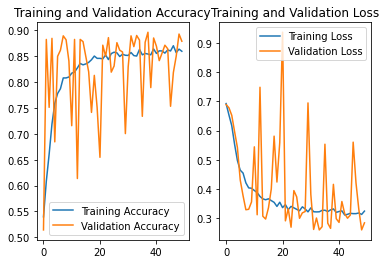

In [53]:
#如果直接用原数据集，准确率77.几。。。可能是神经元个数设置不合理
# np.set_printoptions(threshold=np.inf)

class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(50, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(2, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# checkpoint_save_path = "./checkpoint/Baseline.ckpt"
# if os.path.exists(checkpoint_save_path + '.index'):
#     print('-------------load the model-----------------')
#     model.load_weights(checkpoint_save_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
#                                                  save_weights_only=True,
#                                                  save_best_only=True)

# #history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), validation_freq=1,
#                     callbacks=[cp_callback])

history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), validation_freq=1)

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()